In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn


In [2]:
cmap = plt.get_cmap("tab20")
# 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'

plt.rc('font', family='serif')
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize='small')     # fontsize of the axes title
plt.rc('axes', labelsize= 'small')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='x-small')    # fontsize of the tick labels
plt.rc('ytick', labelsize='x-small')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-small')    # legend fontsize
plt.rc('figure', titlesize='medium')  # fontsize of the figure title

In [3]:
dmin_mem = np.load('dmin_pref.npy')
dmin_state_cover = dmin_mem[0]
dmin_action_cover = np.array(dmin_mem[1]).flatten() + 1
dmin_exp_action_cover = np.array(dmin_mem[2]).flatten() + 1

In [4]:
dmax_mem = np.load('dmax_pref.npy')
dmax_state_cover = dmax_mem[0]
dmax_action_cover = np.array(dmax_mem[1]).flatten() + 1
dmax_exp_action_cover = np.array(dmax_mem[2]).flatten() + 1

In [5]:
# fig = plt.figure(figsize=(7,5))
# cmap = plt.get_cmap("tab20")

# # definitions for the axes
# left, width = 0.1, 0.65
# bottom, height = 0.1, 0.65
# bottom_h = left_h = left + width + 0.1

# rect_scatter = [left, bottom, width, height]
# rect_histx = [left, bottom_h, width, 0.2]


# axScatter = plt.axes(rect_scatter)
# # axHistx = plt.axes(rect_histx)

# #SCATTER PLOT
# axScatter.scatter(dmin_state_cover[:,0], 
#                   dmin_state_cover[:,2] ,
#                   marker='.',
#                   s = 10, 
#                   alpha=0.3, 
#                   c=cmap(0));

# axScatter.scatter(dmax_state_cover[:,0], 
#                   dmax_state_cover[:,2] ,
#                   marker='.',
#                   s = 10, 
#                   alpha=0.3, 
#                   c=cmap(6));
# axScatter.set_xlabel("Battery")
# axScatter.set_ylabel("Harvested Energy")
# axScatter.set_xlim([0, 1])
# axScatter.set_ylim([0, 1])

# # #HISTOGRAM PLOT
# # axHistx.hist(   [dmin_action_cover],
# #                 label = ("Node 1"),
# #                 bins = 10,
# #                 stacked=True,
# #                 histtype='step',
# #                 color=[cmap(0)],
# #                 alpha = 0.5,
# #                 log= not False)


# # axHistx.hist(   [dmax_action_cover],
# #                 label = ("Node 10"),
# #                 bins = 10,
# #                 stacked=True,
# #                 histtype='step',
# #                 color=[cmap(6)],
# #                 alpha = 0.5,
# #                 log= not False)

# # axHistx.set_xlabel("Duty Cycle",fontsize=14)
# # axHistx.xaxis.set_label_position("top")

# plt.show()
# # fig.savefig('scatter.pdf')

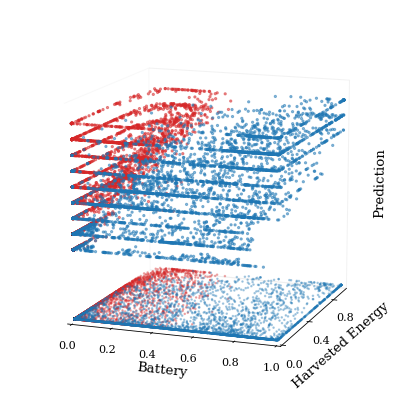

In [6]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=-0.15,top=1.15)

ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=13, azim=-70)

ax.scatter(dmin_state_cover[:,0], 
          dmin_state_cover[:,2] ,
          dmin_state_cover[:,3] ,
          marker='.',
          s = 20, 
          alpha=0.5, 
          c=cmap(0));

ax.scatter(dmax_state_cover[:,0], 
          dmax_state_cover[:,2] ,
          dmax_state_cover[:,3] ,
          marker='.',
          s = 20, 
          alpha=0.5, 
          c=cmap(6));

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([-0.5, 1])



ax.yaxis.set_major_locator(plt.MaxNLocator(3))


ax.scatter(dmin_state_cover[:,0], 
           dmin_state_cover[:,2], 
           c=cmap(0),
           marker='.',
           alpha=0.3,
           s = 10, 
           zdir='z', 
           zs=-0.5)


ax.scatter(dmax_state_cover[:,0], 
           dmax_state_cover[:,2], 
           c=cmap(6),
           marker='.',
           alpha=0.3,
           s = 10, 
           zdir='z', 
           zs=-0.5)


#control distance between label and axis
ax.set_xlabel('Battery')
ax.set_ylabel("Harvested Energy")
ax.set_zlabel("Prediction")


# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

#remove z-axis ticks
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])  



# # Now set color to white (or whatever is "invisible")
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)
fig.tight_layout()
plt.savefig("scatter.pdf",bbox_inches='tight')

